# **UJIAN AKHIR SEMESTER**
## Machine Learning

  <img src="https://upload.wikimedia.org/wikipedia/commons/6/68/LOGO_UEU_BY_ASU-06.png" width=50% height=50%>

  <table style="width:75%">
    <tr>
      <td><b>Dosen Pengampu</b></td>
      <td>Jefry Sunupurwa Asri , S.Kom., M.Kom.</td>
    </tr>
    <tr>
      <td><b>Mahasiswa</b></td>
      <td>Andika Noor Ismawan</td>
    </tr>
      <tr></tr>
      <td><b>NIM</b></td>
      <td>20210801465</td>
    </tr>
  </table>
</div>

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re
import nltk



In [75]:
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [76]:
text = "Long long time ago, in England in Sherwood Forest lived Robin Hood. When he was a boy , he had been cheated by a few noblemen. Since then he had decided that he would rob the rich and give what he got to the poor. The Sheriff of Nottingham had made an advertisement that he would give many rewards for the capture of Robin Hood, nobody had ever caught him. It was because Robin Hood had a number of friends who served him. They acted as informers. When the Sheriff had any plan to catch him, they would warn Robin Hood. Many rich people were scared of going through Sherwood Forest because they knew that Robin Hood would attack them. The Sheriff couldnâ€™t stand it anymore. Then he went to ask for the kingâ€™s help. However, the king refused to send any of his men to help in the capture of Robbin Hood. One day The Sheriff and the noblemen held a competition to choose the best shooter in Nottingham. It was for capturing Robin Hood. Robin Hood was an excellent shooter. Therefore, Robin Hood would participate in the competition to prove that he was the best. He had been warned by his servant, but Robin wasnâ€™t willing to listen. The competition began. William, The Sheriff man, and the man in green were trying for the first prize. it was time for the last arrow to be shot. The winner of this round would be declared the best shooter in Nottingham. William could shot very close to the center. Then the man in greenâ€™s turn made the crowd cheer hysterically. His arrow went through Williamâ€™s arrows and the center of the target. Then he shot two more arrows towards the chair on which the Sheriff sat. No doubt that the man in green was Robin Hood. immediately Robin Hood pulled of his black wig and then jumped over a wall onto his waiting horse and was gone. The Sheriff shouted to his men to catch him, but it was to late. Robin Hood escaped successfully."

processes_text = text.replace("â€™", "'")

print(processes_text)

Long long time ago, in England in Sherwood Forest lived Robin Hood. When he was a boy , he had been cheated by a few noblemen. Since then he had decided that he would rob the rich and give what he got to the poor. The Sheriff of Nottingham had made an advertisement that he would give many rewards for the capture of Robin Hood, nobody had ever caught him. It was because Robin Hood had a number of friends who served him. They acted as informers. When the Sheriff had any plan to catch him, they would warn Robin Hood. Many rich people were scared of going through Sherwood Forest because they knew that Robin Hood would attack them. The Sheriff couldn't stand it anymore. Then he went to ask for the king's help. However, the king refused to send any of his men to help in the capture of Robbin Hood. One day The Sheriff and the noblemen held a competition to choose the best shooter in Nottingham. It was for capturing Robin Hood. Robin Hood was an excellent shooter. Therefore, Robin Hood would p

In [77]:
def preprocess_text(processes_text):
    processes_text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    processes_text = processes_text.lower()  # Mengubah huruf menjadi lowercase
    return processes_text

processed_text = preprocess_text(processes_text)

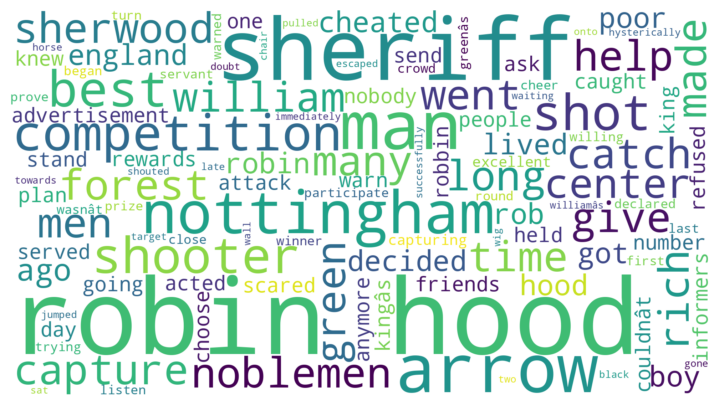

In [78]:
def create_wordcloud(text):
    wordcloud = WordCloud(width=1960, height=1080, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

create_wordcloud(processed_text)

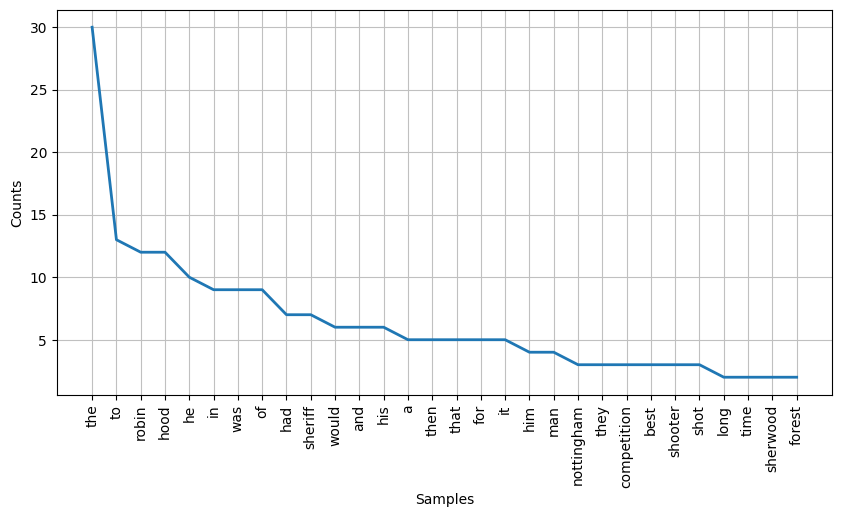

In [79]:
def create_barplot(text):
    tokens = word_tokenize(text)
    fdist = FreqDist(tokens)
    plt.figure(figsize=(10, 5))
    fdist.plot(30, cumulative=False)
    plt.show()

create_barplot(processed_text)

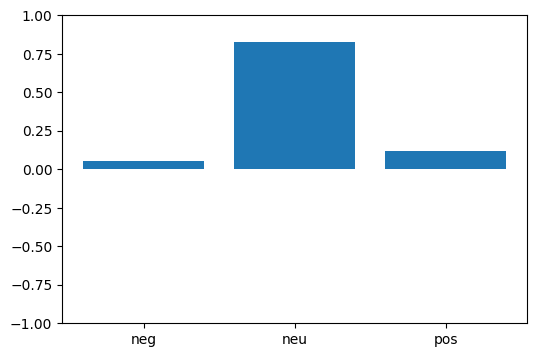

Sentimen negatif: 0.055
Sentimen netral: 0.826
Sentimen positif: 0.119


In [80]:
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    sentiment_scores.pop('compound')
    
    plt.figure(figsize=(6, 4))
    plt.bar(sentiment_scores.keys(), sentiment_scores.values())
    plt.ylim(-1, 1)
    plt.show()
    
    for sentiment, score in sentiment_scores.items():
        if sentiment == 'neg':
            print("Sentimen negatif:", score)
        elif sentiment == 'neu':
            print("Sentimen netral:", score)
        elif sentiment == 'pos':
            print("Sentimen positif:", score)

analyze_sentiment(processed_text)